#Bank Churn prediction
 
### **Context**:

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### **Objective**:

Let us consider you are working as Data scientist with the  bank and you need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### **Data Dictionary**:

The case study is from an open-source dataset from Kaggle.The dataset contains 10,000 sample points with 14 distinct features as follows:

CustomerId: Unique ID which is assigned to each customer

Surname: Last name of the customer
 
CreditScore: It defines the credit history of the customer.
  
Geography: A customer’s location 
   
Gender: It defines the Gender of the customer
   
Age: Age of the customer 
    
Tenure: Number of years for which the customer has been with the bank

NumOfProducts: refers to the number of products that a customer has purchased through the bank.

Balance: Account balance

HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

EstimatedSalary: Estimated salary 

isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

Exited : whether or not the customer left the bank within six month. It can take two values 

0=No ( Customer did not leave the bank )
1=Yes ( Customer left the bank )

## **Please read the instructions carefully before starting the project.** 

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned. 

* Blanks '_______' are provided in the notebook that need to be filled with an appropriate code to get the correct result

* With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space

* Identify the task to be performed correctly and only then proceed to write the required code

* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code"

* Running incomplete code may throw an error

* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors

* Add the results/observations derived from the analysis in the presentation and submit the same in .pdf format

### Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics 
from sklearn import metrics
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read the dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/PythonCourse/DL/Churn.csv')  # Complete the code to read the dataset 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Information

In [ ]:
print('No of rows in train dataset:',df.shape[0],'\n','No of cols:',df.shape[1],'\n')
print(' --------------------')
print('Data Information train data\n',df.info(),'\n')
print(' --------------------')
print('Data Description train data\n',df.describe().T,'\n')
print(' --------------------')
print('Number of Null Values train data\n',df.isnull().sum(),'\n')
print(' --------------------')
print('Number of duplicated values train data\n',df[df.duplicated()==True])
print(' --------------------')
data = df.copy()


No of rows in train dataset: 10000 
 No of cols: 14 

 --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
Data Information t

#### Drop the columns which are unique for all users like IDs, names, and rownumbers

In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)  #### Dropping columns
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Exploratory Analysis



In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

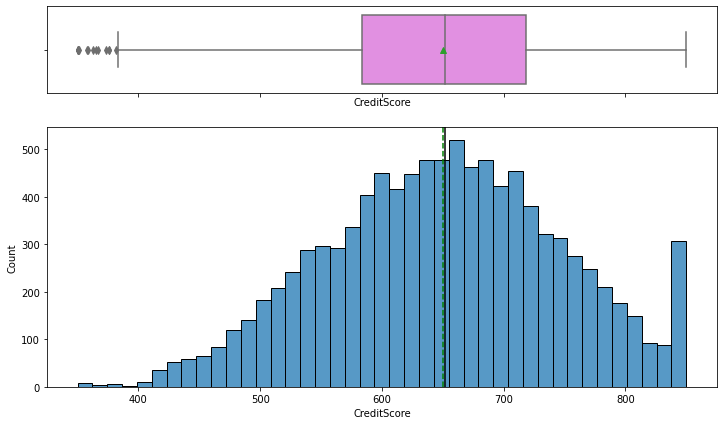

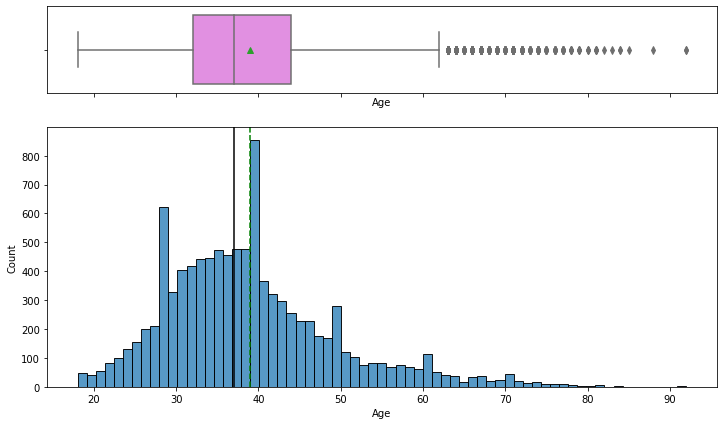

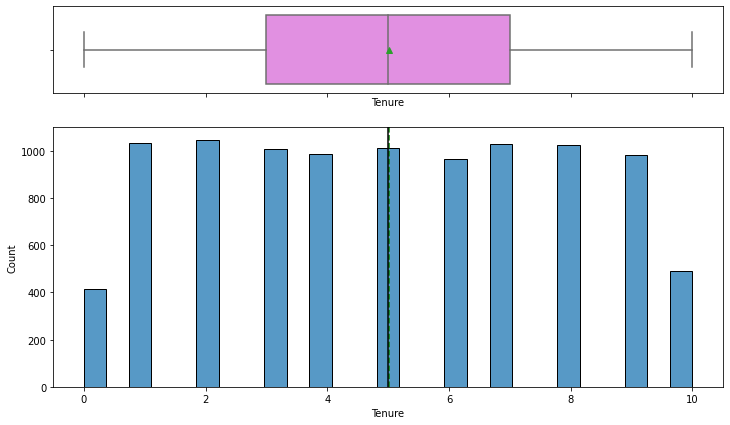

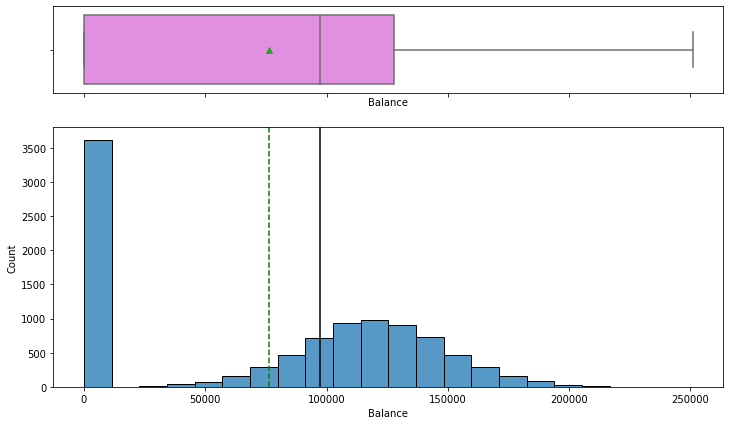

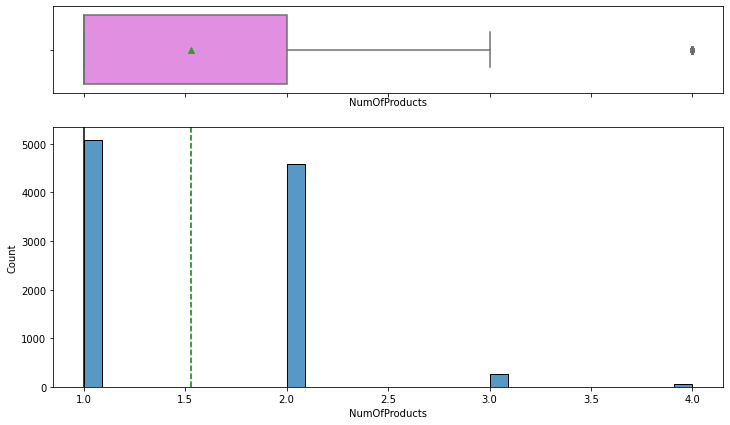

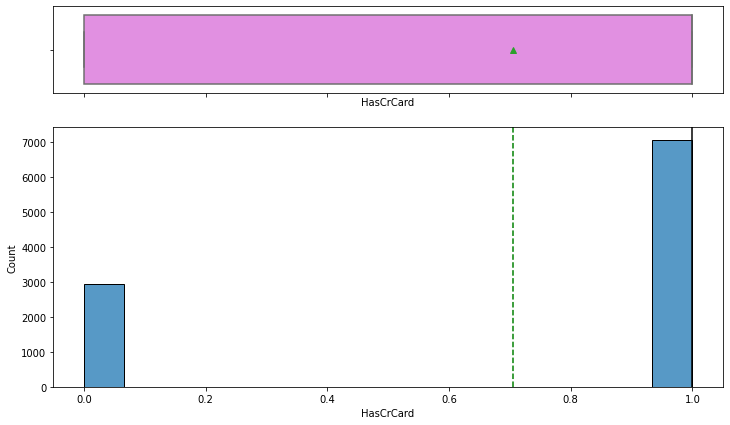

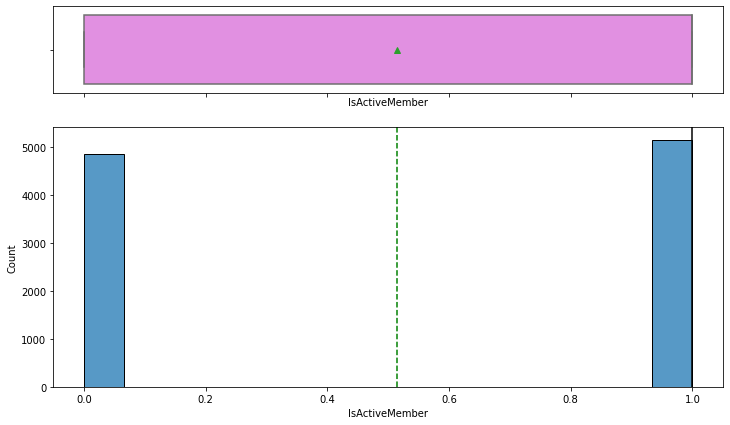

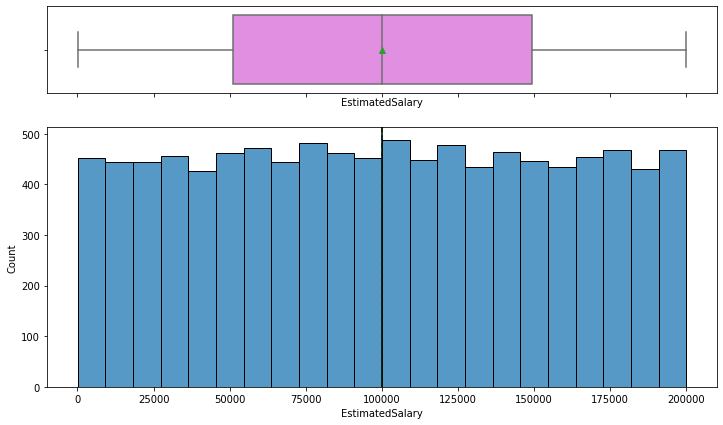

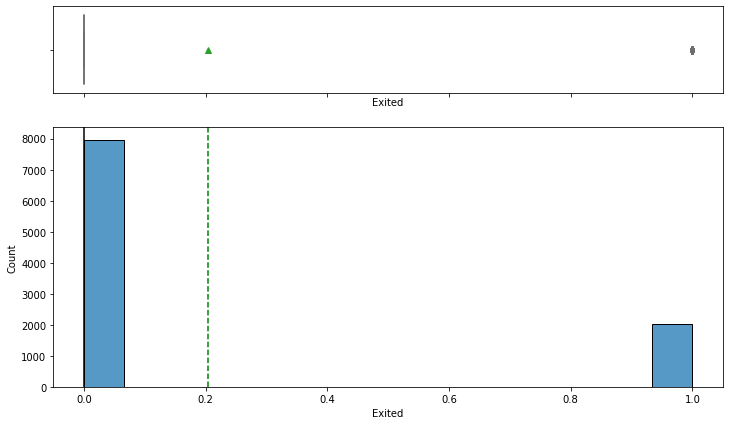

In [ ]:
cols = df.select_dtypes(include=np.number).columns

for feature in cols:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None) 

In [ ]:
def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  

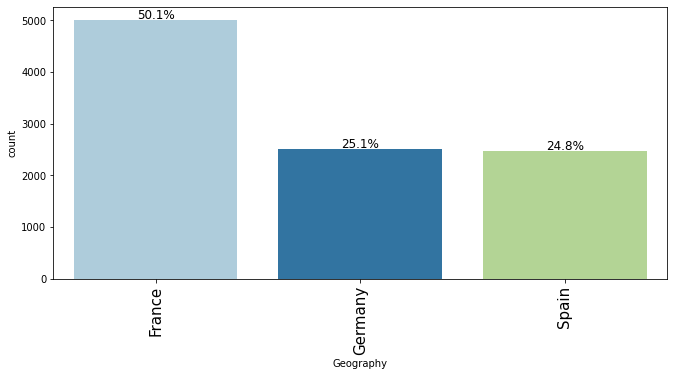

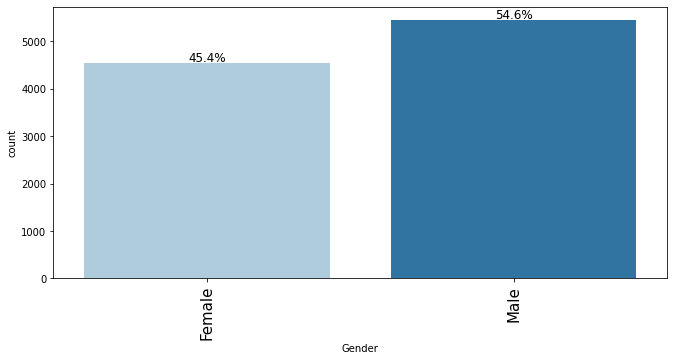

In [ ]:
cols2 = ['Geography',	'Gender']

for feature in cols2:
    labeled_barplot(df, feature, perc=True, n=10)

###  Target variable Vs Categorical variables
Plot the countplot for Geography, Gender, HasCrCard, and IsActiveMember variables.

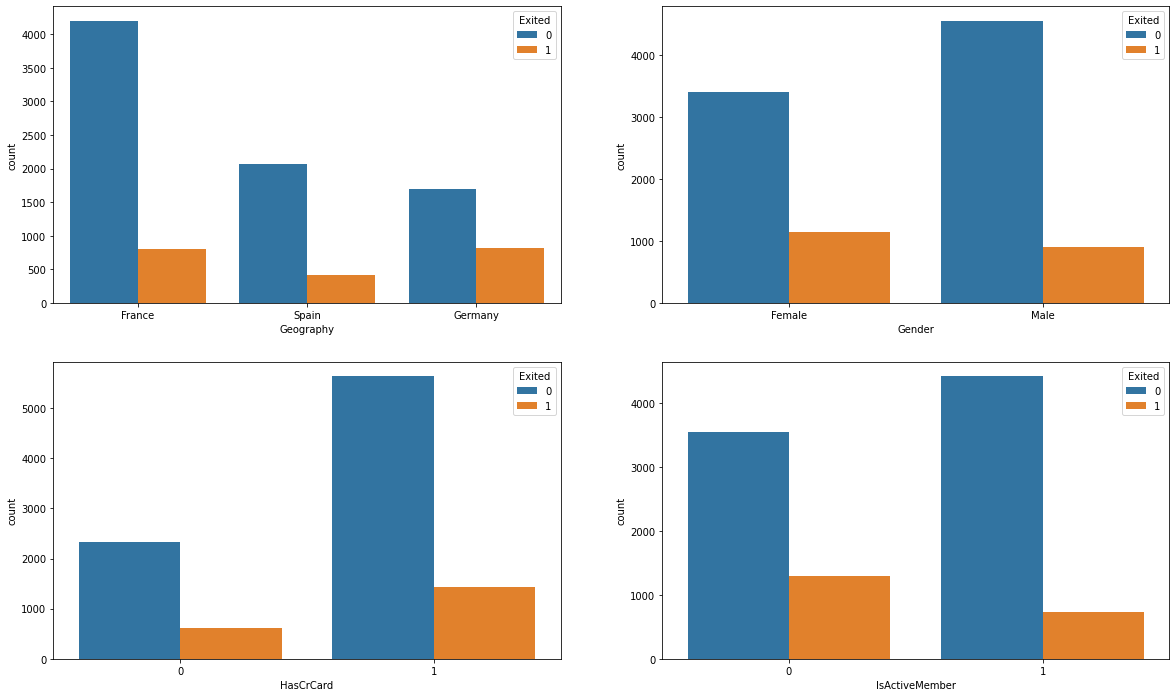

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=ax[0][0])  
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=ax[0][1]) 
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=ax[1][0]) 
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=ax[1][1])  

### Target variable Vs Numerical variables 

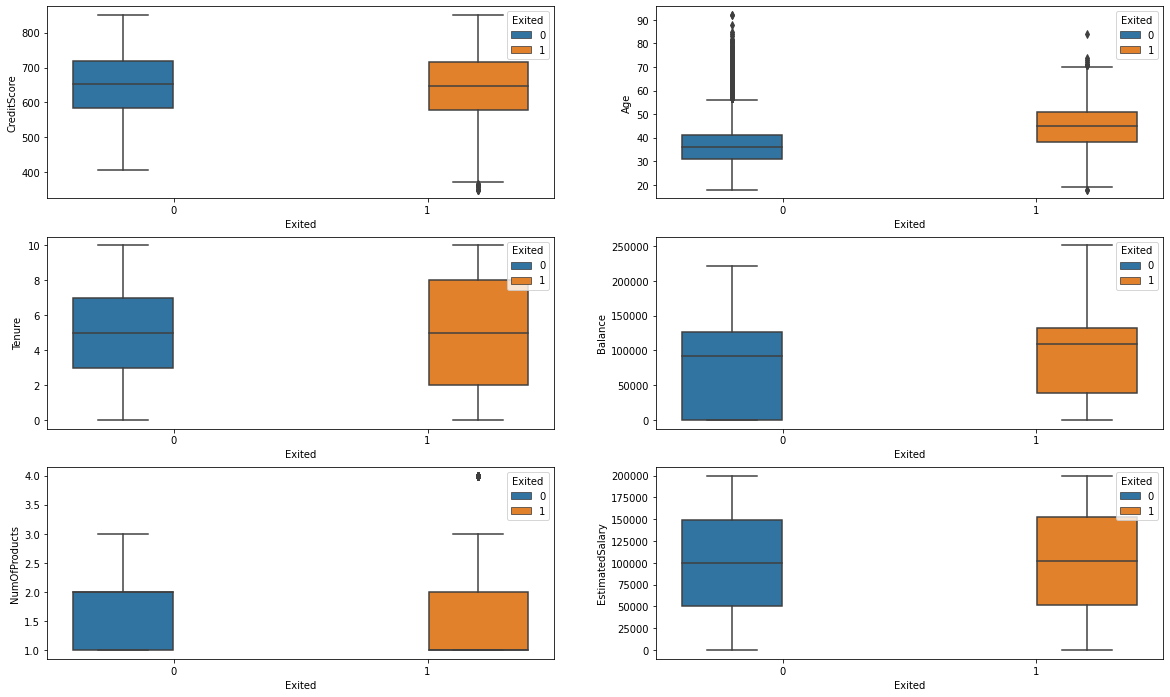

In [ ]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])       
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])      
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])        
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])       
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])      
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])   

### Pairplot

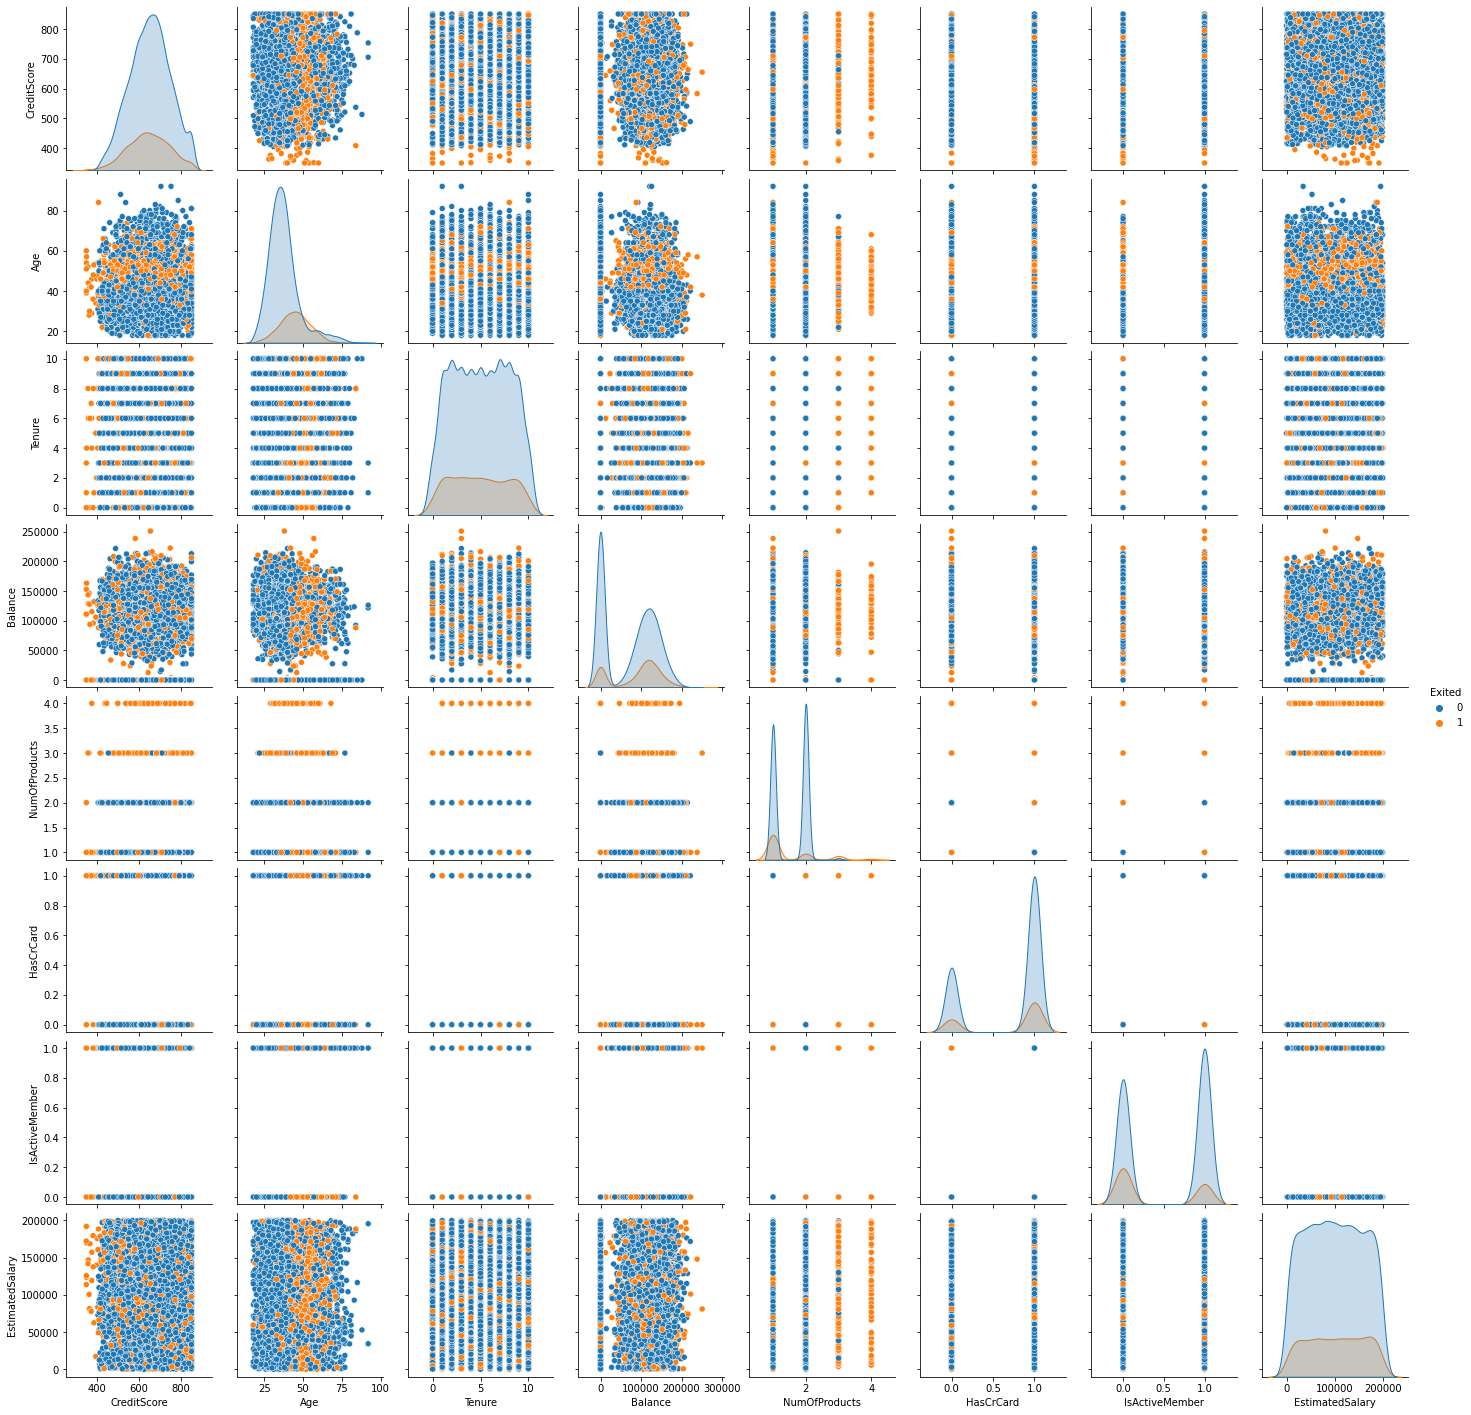

In [ ]:
sns.pairplot(df, diag_kind = 'kde', hue = 'Exited')   

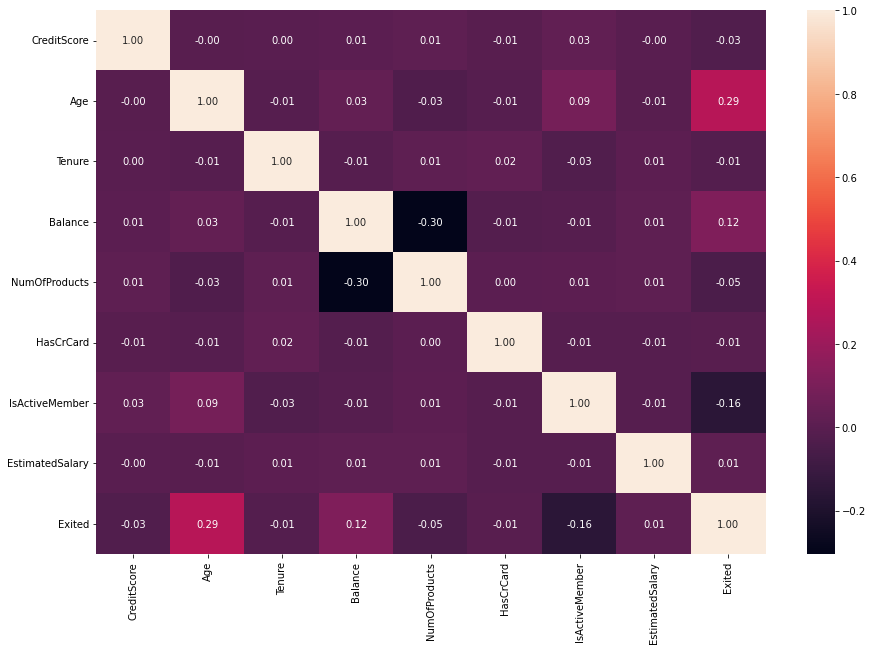

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f') 

## Data Preparation for modeling

In [ ]:
X = df.drop(['Exited'],axis=1)    ## creating independent feature set
y = df[['Exited']]                ## creating dependent feature set


X_large, X_test, y_large, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True) # splitting the data in to training and testing data
X_train, X_val, y_train, y_val = train_test_split(X_large,y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True) # splitting the data into the Training and validation data
print('train data', X_train.shape)
print('validation data',X_val.shape)
print('testing data',X_test.shape)

# Encoding variables
X_train = pd.get_dummies(X_train, columns=["Geography","Gender"],drop_first=True) 
X_test = pd.get_dummies(X_test, columns=["Geography","Gender"],drop_first=True)   
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"],drop_first=True)    

## scaling the data
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

print(X_train.head())
print(X_test.head())
print(X_val.head())



train data (6400, 10)
validation data (1600, 10)
testing data (2000, 10)
      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
3006     0.988678  0.572685 -1.384980  0.610704              1          1   
5735    -0.683985  0.477619 -0.355056 -1.237347              2          0   
5652     0.410474 -0.948376  1.361485 -1.237347              2          0   
26       1.081604 -0.282911 -1.041672  0.962063              1          1   
3596    -0.085130 -0.282911 -1.728288  1.144427              1          0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
3006               0         1.566070                  0                0   
5735               1         0.036348                  0                1   
5652               0         1.745403                  0                0   
26                 1         1.228816                  1                0   
3596               0        -0.764748                  0                0   

 

## Building the model

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

def create_model(optimizer):
      model = Sequential()
      model.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
      model.add(Dense(32,activation='relu'))
      model.add(Dense(1, activation = 'sigmoid'))
      model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
      return model
      
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5052 - accuracy: 0.7894 - val_loss: 0.4681 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.7970 - val_loss: 0.4533 - val_accuracy: 0.7962
Epoch 3/100
200/200 [===========

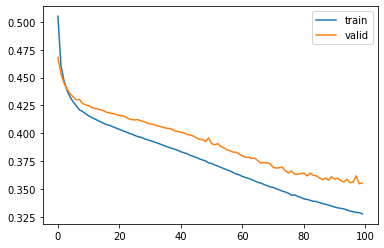

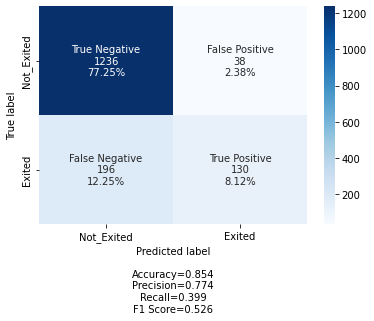

In [ ]:

optimizer = tf.keras.optimizers.SGD()
model=create_model(optimizer)
model.summary()
history = model.fit(X_train,y_train,batch_size=32,validation_data=(X_val,y_val),epochs=100)
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

results = model.evaluate(X_test, y_test)

y_pred1=model.predict(X_val)
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,group_names=labels,categories=categories,cmap='Blues')

### Building second model with Adam Optimizer

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4639 - accuracy: 0.7959 - val_loss: 0.4321 - val_accuracy: 0.8100
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4150 - accuracy: 0.8220 - val_loss: 0.4168 - val_accuracy: 0.8219
Epoch 3/100
200/200 [=========

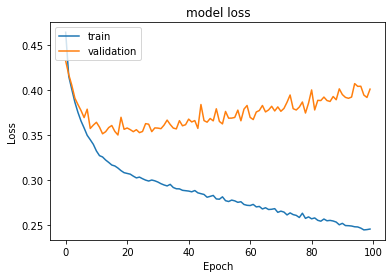

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model=create_model(optimizer)
model.summary()
history = model.fit(X_train,y_train,batch_size=32,validation_data=(X_val,y_val),epochs=100,verbose=1)

#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4415 - accuracy: 0.8023 - val_loss: 0.4202 - val_accuracy: 0.8206
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4041 - accuracy: 0.8311 - val_loss: 0.4024 - val_accuracy: 0.8356
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3876 - accuracy: 0.8386 - val_loss: 0.3930 - val_accuracy: 0.8400
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3731 - accuracy: 0.8470 - val_loss: 0.3775 - val_accuracy: 0.8406
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3623 - accuracy: 0.8481 - val_loss: 0.3706 - val_accuracy: 0.8419
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3523 - accuracy: 0.8566 - val_loss: 0.3645 - val_accuracy: 0.8481
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3458 - accuracy: 0.8592 - val_loss: 0.3591 - val_accuracy: 0.8469

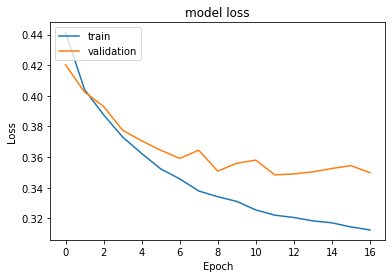

In [ ]:
from keras import callbacks 
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
model_e=create_model(optimizer)
history_e = model_e.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])
# Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = TruePositive / (TruePositive + FalseNegative)


Specificity = TrueNegative / (FalsePositive + TrueNegative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value.

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.184320, G-Mean=0.809


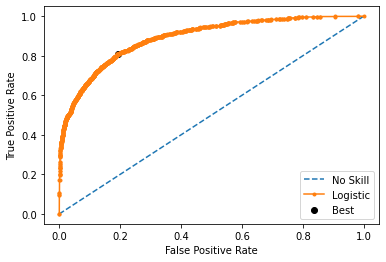

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

yhat = model_e.predict(X_train)
yhat = yhat[:, 0]
fpr, tpr, thresholds = roc_curve(y_train, yhat)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

50/50 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1274
           1       0.49      0.77      0.60       326

    accuracy                           0.79      1600
   macro avg       0.71      0.78      0.73      1600
weighted avg       0.84      0.79      0.81      1600



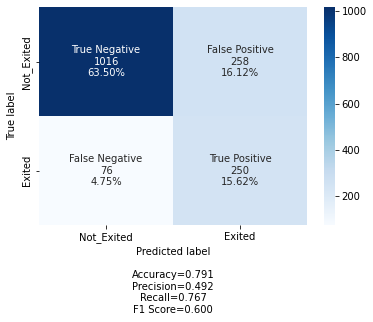

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_e.predict(X_val)
y_pred_e = (y_pred_e > thresholds[ix])
cr=metrics.classification_report(y_val,y_pred_e)
print(cr)

cm1=confusion_matrix(y_val, y_pred_e)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,group_names=labels,categories=categories, cmap='Blues')

## Building the third Model

In [ ]:
backend.clear_session()
np.random.seed(2)
import random
random.seed(2)
tf.random.set_seed(2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainabl

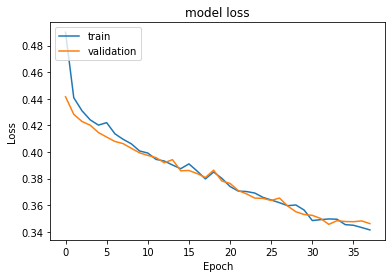

In [ ]:
model_3 = Sequential()
model_3.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
model_3.add(Dropout(0.2))
model_3.add(Dense(16,activation='relu'))
model_3.add(Dropout(0.1))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(1, activation = 'sigmoid'))
model_3.summary()
optimizer = tf.keras.optimizers.Adam(0.001)
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_3 = model_3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.197977, G-Mean=0.794


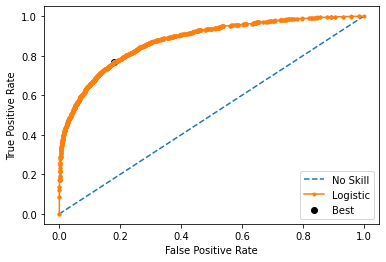

50/50 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1274
           1       0.51      0.74      0.60       326

    accuracy                           0.80      1600
   macro avg       0.71      0.78      0.73      1600
weighted avg       0.84      0.80      0.81      1600



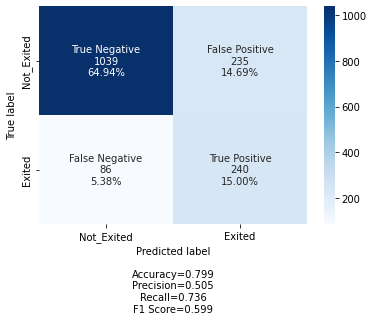

In [ ]:
yhat = model_3.predict(X_train)
yhat = yhat[:, 0]
fpr, tpr, thresholds = roc_curve(y_train, yhat)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()


y_pred_e=model_3.predict(X_val)
y_pred_3 = (y_pred_e > thresholds[ix])
cr=metrics.classification_report(y_val,y_pred_3)
print(cr)


cm1=confusion_matrix(y_val, y_pred_3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1, group_names=labels, categories=categories, cmap='Blues')

#### Hyperparameter Optimization

Some important parameters to look out for while optimizing neural networks are:

-Type of architecture

-Number of Layers

-Number of Neurons in a layer

-Regularization parameters

-Learning Rate

-Type of optimization / backpropagation technique to use

-Dropout rate

-Weight sharing

### Building a model and tuning it using hyperparameter tuning

In [ ]:
backend.clear_session()
np.random.seed(2)
import random
random.seed(2)
tf.random.set_seed(2)

def create_model_v2(dropout_rate=0.1,lr=0.001,layer_1=64,layer_2=32):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.5))
    model.add(Dense(layer_2,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

##### Using Grid search

We are using grid search to optimize two hyperparameters called **batch size, epochs** due to the limited time. But you can optimize the other hyperparameters as mentioned above

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v2, verbose=1)
param_grid = {'batch_size':[40, 64, 128],"lr":[0.01,0.001,0.1]}
kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

grid_result = grid.fit(X_train, y_train,validation_data = (X_val,y_val),verbose=1) 

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
50/50 [==============================] - 1s 7ms/step - loss: 0.4619 - accuracy: 0.8019 - val_loss: 0.4311 - val_accuracy: 0.8050
Best: 0.809687 using {'batch_size': 128, 'lr': 0.01}


##Let's create the final model with the obtained configuration after hyperparameter tuning

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
50/50 [==============================] - 1s 7ms/step - loss: 0.4685 - accuracy: 0.7980 - val_loss: 0.4343 - val_accuracy: 0.8050
Epoch 2/100
50/50 [========================

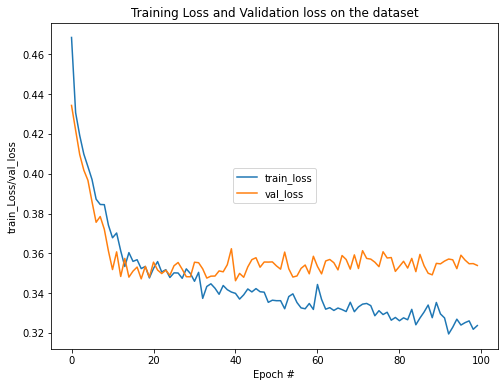

In [ ]:
estimator_v2=create_model_v2(lr=grid_result.best_params_['lr'])
estimator_v2.summary()
history_h=estimator_v2.fit(X_train, y_train, epochs=100, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_data=(X_val,y_val))
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()

##### Tuning the threshold

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.242811, G-Mean=0.811


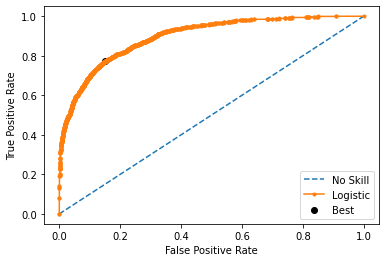

50/50 [==============================] - 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [False]
 [ True]
 [ True]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1274
           1       0.51      0.72      0.60       326

    accuracy                           0.80      1600
   macro avg       0.72      0.77      0.73      1600
weighted avg       0.84      0.80      0.81      1600



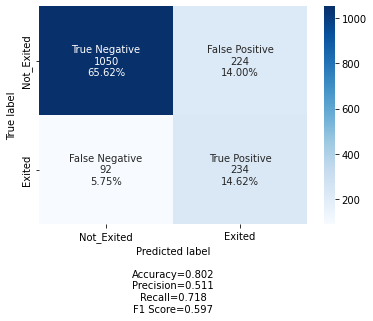

In [ ]:
yhat = estimator_v2.predict(X_train)
yhat = yhat[:, 0]
fpr, tpr, thresholds = roc_curve(y_train, yhat)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

y_pred_h = estimator_v2.predict(X_val)
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)
cr=metrics.classification_report(y_val,y_pred_h)
print(cr)

cm_h=confusion_matrix(y_val, y_pred_h)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Now try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [ ]:
from imblearn.over_sampling import SMOTE
sm  = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train) 
print('After UpSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192, 1) 



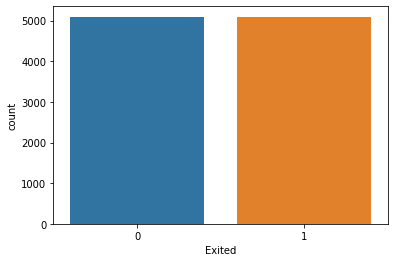

In [ ]:
sns.countplot(y_train['Exited'])

## Build a model with Balanced Dataset

In [ ]:
backend.clear_session()
np.random.seed(2)
import random
random.seed(2)
tf.random.set_seed(2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainabl

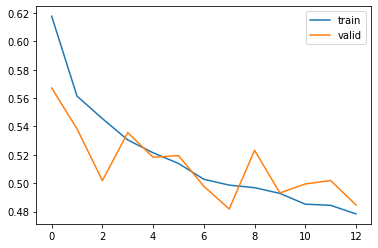

In [ ]:
model_4 = Sequential()
model_4.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
model_4.add(Dropout(0.2))
model_4.add(Dense(16,activation='relu'))
model_4.add(Dropout(0.1))
model_4.add(Dense(8,activation='relu'))
model_4.add(Dense(1, activation = 'sigmoid'))
model_4.summary()

es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
optimizer = tf.keras.optimizers.Adam(0.001)
model_4.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
history_4 = model_4.fit(X_train,y_train,batch_size=63,epochs=100,verbose=1,validation_data = (X_val,y_val),callbacks=[es_cb])

hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_4.epoch

plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


319/319 [==============================] - 1s 2ms/step
Best Threshold=0.483911, G-Mean=0.796


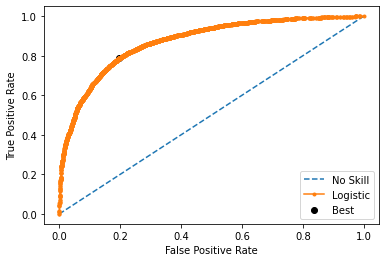

50/50 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1274
           1       0.44      0.66      0.53       326

    accuracy                           0.76      1600
   macro avg       0.67      0.72      0.68      1600
weighted avg       0.81      0.76      0.77      1600



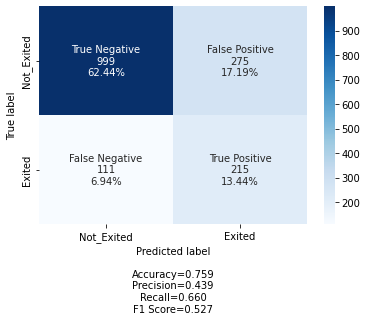

In [ ]:
yhat = model_4.predict(X_train)

yhat = yhat[:, 0]
fpr, tpr, thresholds = roc_curve(y_train, yhat)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
y_pred_s = model_4.predict(X_val)
y_pred_s = (y_pred_s >thresholds[ix])
from sklearn import metrics
cr=metrics.classification_report(y_val,y_pred_s)
print(cr)

cm_s=confusion_matrix(y_val, y_pred_s)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

63/63 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1593
           1       0.46      0.70      0.55       407

    accuracy                           0.77      2000
   macro avg       0.68      0.74      0.70      2000
weighted avg       0.82      0.77      0.79      2000



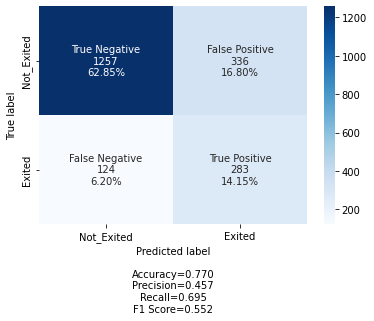

In [ ]:
y_pred_test = model_4.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_test)
print(cr)
cm_h=confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

## **Conclusion:**


*   

In [106]:
%%shell
jupyter nbconvert --to html Bank_Churn_Prediction.ipynb

[NbConvertApp] Converting notebook Bank_Churn_Prediction.ipynb to html
[NbConvertApp] Writing 2397840 bytes to Bank_Churn_Prediction.html
